# Chapter 3 Exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import arviz as az
import pymc3 as pm
np.random.seed(seed=0)

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
az.style.use('arviz-darkgrid')

## Question 6
***

In [3]:
np.random.seed(1)
N = 100
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)

x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real * x
y = y_real + eps_real

In [4]:
with pm.Model() as model_g:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)

In [5]:
%%time
with model_g:
    trace_nuts_non_centered = pm.sample(draws=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:16<00:00, 122.92draws/s]
The acceptance probability does not match the target. It is 0.8790052122255555, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


CPU times: user 3.15 s, sys: 565 ms, total: 3.71 s
Wall time: 21.4 s


In [6]:
nuts_non_centered_dataset = az.from_pymc3(trace=trace_nuts_non_centered)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c18ed8cf8>,
      dtype=object)

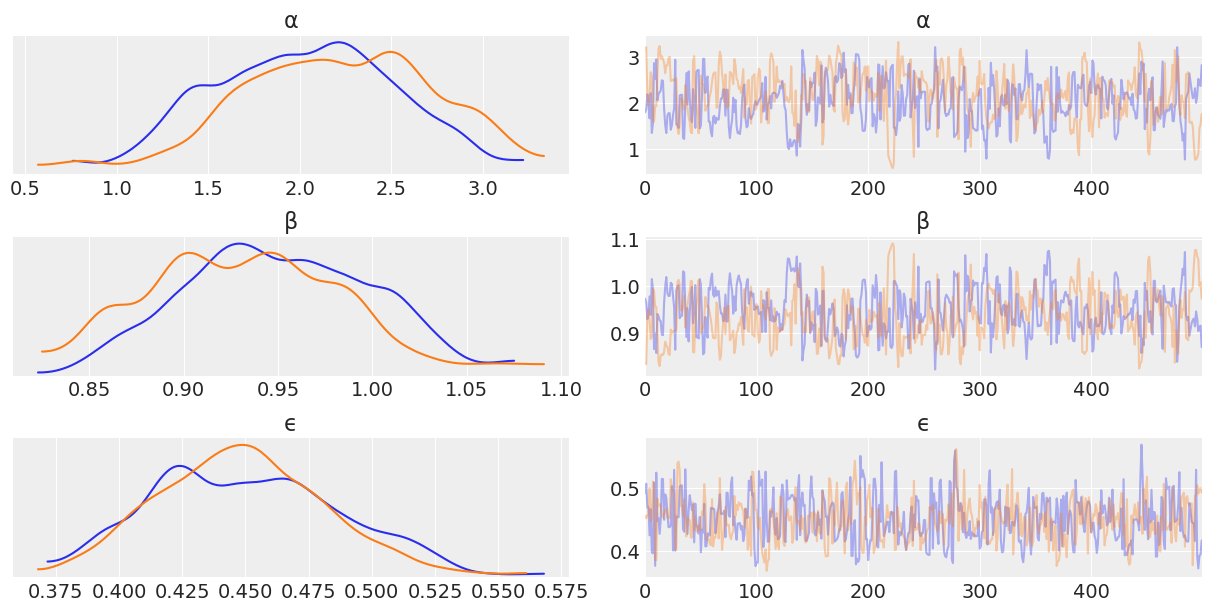

In [7]:
az.plot_trace(trace_nuts_non_centered, var_names=['α', 'β', 'ϵ'])

[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a64e2b0>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a64e2b0>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a64e2b0>,
       dtype=object)]

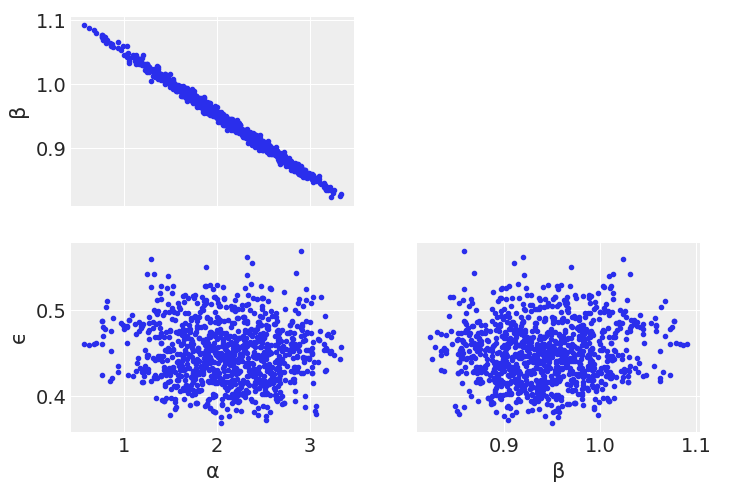

In [8]:
az.plot_pair(trace_nuts_non_centered, var_names=['α', 'β', 'ϵ'])

In [9]:
%%time
with model_g:
    step = pm.Metropolis()
    trace_mh_non_centered = pm.sample(draws=500, step=step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [ϵ]
>Metropolis: [β]
>Metropolis: [α]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:01<00:00, 1638.94draws/s]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


CPU times: user 1.93 s, sys: 173 ms, total: 2.1 s
Wall time: 2.7 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c26933748>,
      dtype=object)

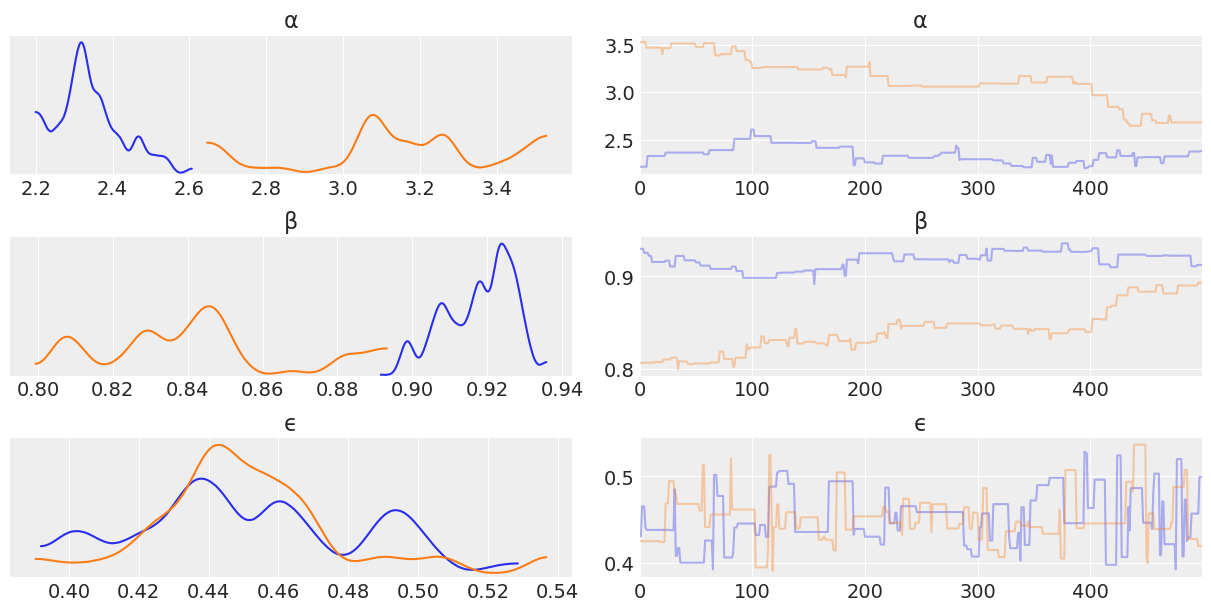

In [10]:
az.plot_trace(trace_mh_non_centered, var_names=['α', 'β', 'ϵ'])

In [11]:
az.summary(trace_nuts_non_centered, var_names=['α', 'β', 'ϵ'])

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
α,2.10,0.53,0.05,1.13,3.03,143.0,1.02
β,0.94,0.05,0.00,0.85,1.03,140.0,1.02
ϵ,0.45,0.04,0.00,0.39,0.52,503.0,1.00


In [12]:
az.summary(trace_mh_non_centered, var_names=['α', 'β', 'ϵ'])

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
α,2.74,0.43,0.15,2.21,3.47,1.0,3.27
β,0.88,0.04,0.01,0.81,0.93,1.0,3.14
ϵ,0.45,0.03,0.00,0.40,0.51,109.0,1.00


We'll standardize the variables and take samples again. We don't need to redefine the model but will do so for clarities sake

In [13]:
# or standardize the data
x_centered = (x - x.mean())/x.std()
y_centered = (y - y.mean())/y.std()

In [14]:
with pm.Model() as model_g_centered:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = pm.Deterministic('μ', α + β * x_centered)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y_centered)

In [15]:
%%time
with model_g_centered:
    trace_nuts_centered = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:01<00:00, 1201.29draws/s]


CPU times: user 1.9 s, sys: 152 ms, total: 2.05 s
Wall time: 3.02 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c276eccc0>,
      dtype=object)

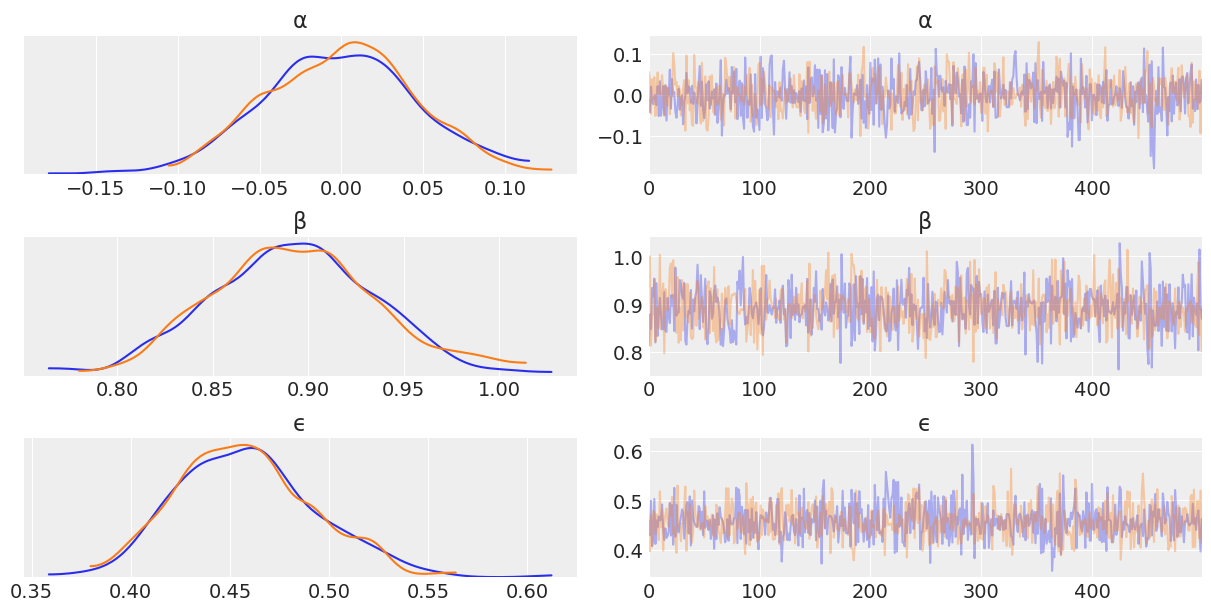

In [16]:
az.plot_trace(trace_nuts_centered, var_names=['α', 'β', 'ϵ'])

[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c27bfc860>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c27bfc860>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c27bfc860>,
       dtype=object)]

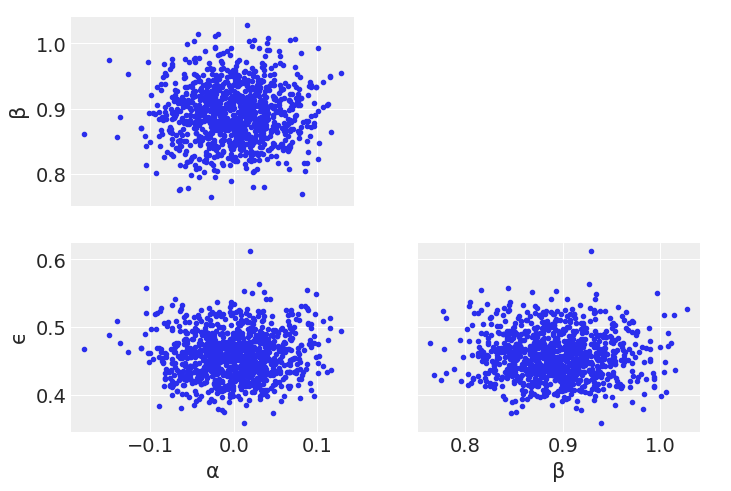

In [17]:
az.plot_pair(trace_nuts_centered, var_names=['α', 'β', 'ϵ'])

In [18]:
%%time
with model_g_centered:
    # step = pm.Metropolis(vars=["μ"])
    step = pm.Metropolis()
    trace_mh_centered = pm.sample(step=step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [ϵ]
>Metropolis: [β]
>Metropolis: [α]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:00<00:00, 3013.45draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


CPU times: user 1.73 s, sys: 142 ms, total: 1.88 s
Wall time: 2.12 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2718d668>,
      dtype=object)

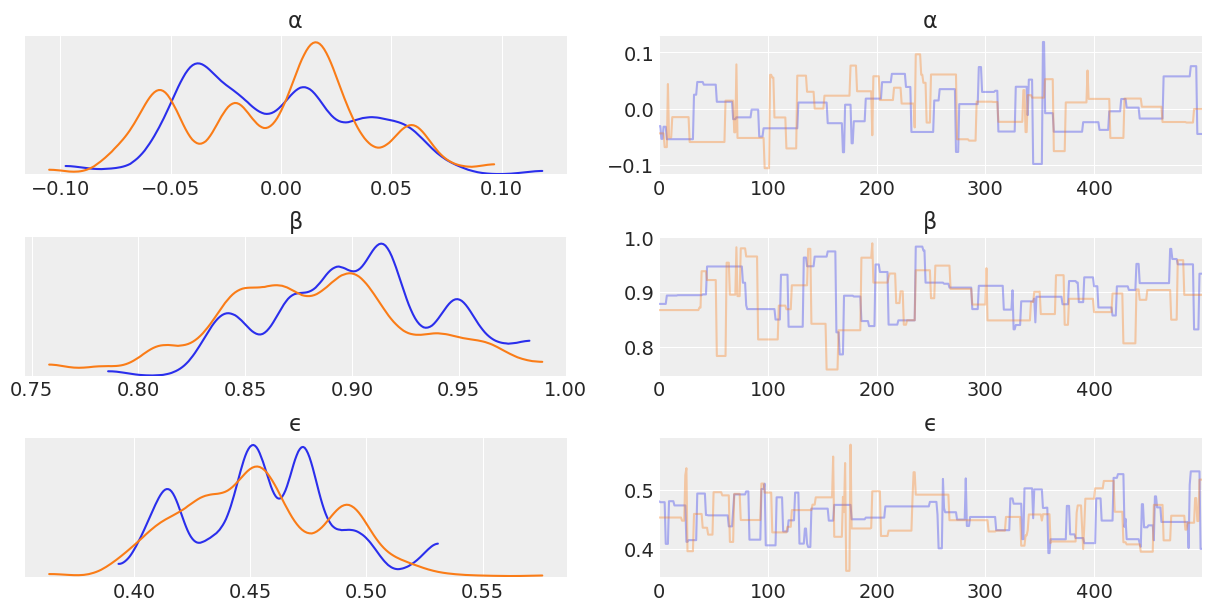

In [19]:
az.plot_trace(trace_mh_centered, var_names=['α', 'β', 'ϵ'])

[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2883fb00>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2883fb00>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2883fb00>,
       dtype=object)]

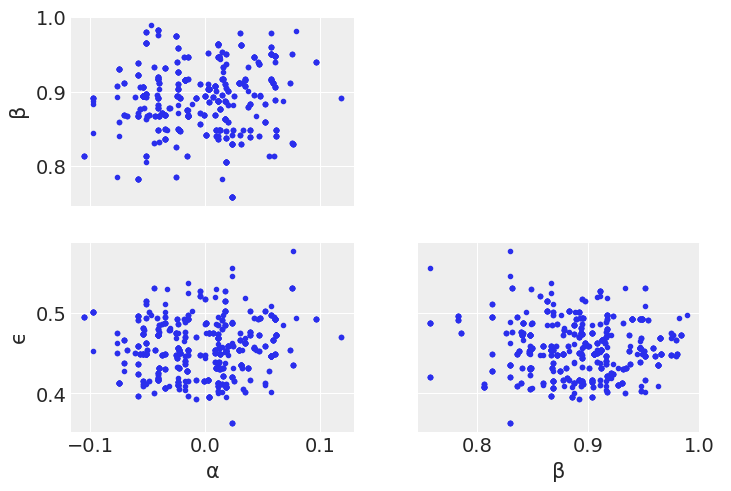

In [20]:
az.plot_pair(trace_mh_centered, var_names=['α', 'β', 'ϵ'])

Looking through the plots there's a couple things to note

Metropolis Hastings is less effective at sampling than NUTS. This is indicated by
 1. The Metropolis Hasting trace plots looking "square" when compared the NUTS traceplot. This is due to the sampler getting "stuck" at a value.
 2. The kernel density estimates of each chain have "squiggly" topologies
 3. The effective number of samples for Non Centered Metropolis Hastings is 1
 
One thing to note though is that Metropolis Hastings does sample faster than NUTS. While the the results aren't great credit is due where its deserved!
 
Diving into the problem further, we can see that $\alpha$ and $\beta$ are linearly correlated. Metropolis Hastings does not sample well when toplogies have such shapes. We'll talk more about this in Chapter 8, but for now note how centering x helps somewhat with the Metropolis Hasting sampler, as centering decorrelates $\alpha$ and $\beta$ parameters.

The biggest takeaway is the effectiveness of NUTS, regardless of topology in these two cases. This is not to say NUTS can handle anything you throw at it, there are some topologies that are hard, but by and large NUTS does quite well in many situations.